# 1. Theoretical Framework



## 1. Objective of the index
The goal of this index is to create 

# Import Required Packages

In [1318]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler

# 2. Data Selection - Importing Data

In [1319]:
# This is for macroeconomic indicators
df_gdp_per_capita = pd.read_csv('GDP per capita (PPP).csv')
df_gdp_growth_rate = pd.read_csv('GDP growth rate.csv')
df_FCE = pd.read_csv('Final consumption expenditure.csv')
df_gov_debt = pd.read_excel('Government debt.xls')
df_inflation = pd.read_csv('Inflation annually.csv')

In [1320]:
#This is the Trade and Investment factors
df_current_account_balance = pd.read_csv("current accoung balance (Macroeconomic Indicators ).csv")
df_exports = pd.read_csv("Exports of goods and services.csv")
df_imports = pd.read_csv("Imports of goods and services.csv")

In [1321]:
# This is for Human Capital
df_labour_force =pd.read_csv('Labour Force Participant Rate.csv')
df_life_expectancy_at_birth = pd.read_csv('Life expectancy at birth.csv')
df_school_enrollment = pd.read_csv('School enrollment.csv')
df_unemployment_rate = pd.read_csv('Unemployment rate.csv')


In [1322]:
#This is for infrastructure and Technology

df_access_to_electricity = pd.read_csv('Access to electricity.csv')
df_access_to_internet = pd.read_csv('indivisual using the internet.csv')
df_mobile_subscriptions = pd.read_csv('Mobile cellular subscriptions.csv')
df_LPI_Score = pd.read_excel('LPI Score.xlsx')


In [1323]:
# This is for Institution and Political Factors
df_CPI = pd.read_excel("CPI2023_Global_Results__Trends.xlsx",skiprows=3, engine='openpyxl')
df_political_stability = pd.read_csv("Political Stability and Absence of ViolenceTerrorism Percentile Rank.csv")

# This is for WGI data set we will only be using the regulatory quality
df_regulatory_quality = pd.read_excel("wgidataset.xlsx")

In [1324]:
#This is the environmental and sustainability

df_CO2_emissions = pd.read_csv("CO2 Emission.csv")
df_CO2_emissions_per_capita = pd.read_csv("CO2 Emission per capita.csv")
df_renewable_energy_consumption = pd.read_csv("Renewable energy consumption.csv")

# 3. Imputing of Missing Datas

In [1325]:

# This is for the data cleaning process
dataframes = [df_gdp_growth_rate, df_gdp_per_capita, df_FCE, df_gov_debt, df_inflation,
              df_current_account_balance, df_exports, df_imports, df_labour_force,
              df_life_expectancy_at_birth, df_school_enrollment, df_unemployment_rate,
              df_access_to_electricity, df_access_to_internet, df_mobile_subscriptions,
              df_LPI_Score, df_CPI, df_political_stability, df_regulatory_quality,
              df_CO2_emissions, df_CO2_emissions_per_capita, df_renewable_energy_consumption]


# This is to remove the unwanted data from the dataframes
for df in dataframes:
  df.replace(["..","...", "no data"], pd.NA, inplace=True)  # or np.nan if you're using numpy



In [1326]:
# Print sum of all missing valeues
def check_missing_values():
  print("The number of missing values in each dataset:")
  print("GDP per capita (PPP):", df_gdp_per_capita.isnull().sum().sum())
  print("GDP growth rate:", df_gdp_growth_rate.isnull().sum().sum())
  print("Final consumption expenditure:", df_FCE.isnull().sum().sum())
  print("Government debt:", df_gov_debt.isnull().sum().sum())
  print("Inflation annually:", df_inflation.isnull().sum().sum())
  print("Current account balance:", df_current_account_balance.isnull().sum().sum())
  print("Exports of goods and services:", df_exports.isnull().sum().sum())
  print("Imports of goods and services:", df_imports.isnull().sum().sum())
  print("Labour Force Participant Rate:", df_labour_force.isnull().sum().sum())
  print("Life expectancy at birth:", df_life_expectancy_at_birth.isnull().sum().sum())
  print("School enrollment:", df_school_enrollment.isnull().sum().sum())
  print("Unemployment rate:", df_unemployment_rate.isnull().sum().sum())
  print("Access to electricity:", df_access_to_electricity.isnull().sum().sum())
  print("Access to internet:", df_access_to_internet.isnull().sum().sum())
  print("Mobile cellular subscriptions:", df_mobile_subscriptions.isnull().sum().sum())
  print("LPI Score:", df_LPI_Score.isnull().sum().sum())
  print("CPI:", df_CPI.isnull().sum().sum())
  print("Political Stability and Absence of ViolenceTerrorism Percentile Rank:", df_political_stability.isnull().sum().sum())
  print("WGI dataset:", df_regulatory_quality.isnull().sum().sum())
  print("CO2 Emission:", df_CO2_emissions.isnull().sum().sum())
  print("CO2 Emission per capita:", df_CO2_emissions_per_capita.isnull().sum().sum())
  print("Renewable energy consumption:", df_renewable_energy_consumption.isnull().sum().sum())
  
check_missing_values()

asian_countries_standard = [
    "Afghanistan", "Bangladesh", "Bhutan", "Brunei",
    "Cambodia", "China", "India", "Indonesia", "Japan",
    "Kazakhstan", "Kyrgyzstan", "Laos", "Malaysia", "Maldives",
    "Mongolia", "Myanmar", "Nepal", "North Korea", "Pakistan",
    "Philippines", "Singapore", "South Korea", "Sri Lanka",
    "Taiwan", "Tajikistan", "Thailand", "East Timor",
    "Turkmenistan", "Uzbekistan", "Vietnam", "Macau", "Hong Kong","Afghanistan",
    "American Samoa",
    "Australia",
    "Bangladesh",
    "Bhutan",
    "Brunei",
    "Cambodia",
    "China",
    "Fiji",
    "French Polynesia",
    "Guam",
    "Hong Kong",
    "India",
    "Indonesia",
    "Japan",
    "Kazakhstan",
    "Kiribati",
    "North Korea",
    "South Korea",
    "Kyrgyzstan",
    "Laos",
    "Macau",
    "Malaysia",
    "Maldives",
    "Marshall Islands",
    "Micronesia",
    "Mongolia",
    "Myanmar",
    "Nauru",
    "Nepal",
    "New Caledonia",
    "New Zealand",
    "Northern Mariana Islands",
    "Pakistan",
    "Palau",
    "Papua New Guinea",
    "Philippines",
    "Samoa",
    "Singapore",
    "Solomon Islands",
    "Sri Lanka",
    "Tajikistan",
    "Thailand",
    "East Timor",
    "Tonga",
    "Turkmenistan",
    "Tuvalu",
    "Uzbekistan",
    "Vanuatu",
    "Vietnam",
    "Taiwan"
] 


country_name_mapping = {
    "Brunei Darussalam": "Brunei",
    "Hong Kong SAR": "Hong Kong",
    "Hong Kong SAR, China": "Hong Kong",
    "Hong Kong, China": "Hong Kong",
    "China, People's Republic of": "China",
    "Korea, Republic of": "South Korea",
    "Korea, Rep.": "South Korea",
    "Korea, South": "South Korea",
    "Korea, North": "North Korea",
    "Korea, Dem. Rep.": "North Korea",
    "Korea, Dem. People's Rep.": "North Korea",
    "Lao PDR": "Laos",
    "Lao P.D.R.": "Laos",
    "Lao People's Democratic Republic": "Laos",
    "Taiwan Province of China": "Taiwan",
    "Taiwan, China": "Taiwan",
    "Taipei,China": "Taiwan",
    "Timor-Leste": "East Timor",
    "TC<rkiye": "Turkey",
    "Türkiye, Republic of": "Turkey",
    "Türkiye": "Turkey",
    "TÃ¼rkiye": "Turkey",  # Encoding variant
    "Russian Federation": "Russia",  # Russia is partially in Asia
    "Iran, Islamic Rep.": "Iran",
    "Yemen, Rep.": "Yemen",
    "Kyrgyz Republic": "Kyrgyzstan",
    "Macao SAR": "Macau",
    "Macao SAR, China": "Macau",
    "West Bank and Gaza": "Palestine",
    "Palestine": "Palestine",  # Redundant, but harmless
    "Viet Nam": "Vietnam",
    "Micronesia, Fed. Sts.": "Micronesia"  # Newly added
}


print(len(asian_countries_standard))

The number of missing values in each dataset:
GDP per capita (PPP): 56
GDP growth rate: 19
Final consumption expenditure: 542
Government debt: 7
Inflation annually: 84
Current account balance: 20
Exports of goods and services: 64
Imports of goods and services: 64
Labour Force Participant Rate: 191
Life expectancy at birth: 0
School enrollment: 162
Unemployment rate: 203
Access to electricity: 9
Access to internet: 74
Mobile cellular subscriptions: 67
LPI Score: 0
CPI: 1093
Political Stability and Absence of ViolenceTerrorism Percentile Rank: 27
WGI dataset: 6756
CO2 Emission: 0
CO2 Emission per capita: 0
Renewable energy consumption: 67
83


In [1327]:
def clean_dataframe(df, value_name):
    # Clean column names
    df.columns = df.columns.map(str).str.strip()

    # Standardize country names before anything else
    df["Country Name"] = df["Country Name"].replace(country_name_mapping)
    
    # Ensure year columns are numeric
    year_cols = [str(year) for year in range(2015, 2024) if str(year) in df.columns]
    df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce')

    # Fill missing 2023 values with the most recent available year's value
    def get_latest_value(row):
        if pd.isna(row.get("2023")):
            for year in reversed(range(2015, 2023)):
                val = row.get(str(year))
                if pd.notna(val):
                    return val
        return row.get("2023")

    df["2023"] = df.apply(get_latest_value, axis=1)

    # Drop rows with no usable 2023 data
    df = df.dropna(subset=["2023"])

    # Keep only Country Name and 2023 column
    df = df[["Country Name", "2023"]].rename(columns={"2023": value_name})

    # Aggregate if duplicates exist
    if df.duplicated(subset=["Country Name"]).any():
        df = df.groupby("Country Name", as_index=False)[value_name].mean()

    return df


In [1328]:
df_gdp_per_capita = clean_dataframe(df_gdp_per_capita, 'gdp_per_capita_2023')
df_gdp_growth_rate = clean_dataframe(df_gdp_growth_rate, 'gdp_growth_rate_2023')
df_FCE = clean_dataframe(df_FCE, 'final_consumption_expenditure_2023')
print(len(df_gov_debt))
df_gov_debt = clean_dataframe(df_gov_debt, 'government_debt_2023')

print(len(df_gov_debt))
df_inflation = clean_dataframe(df_inflation, 'inflation_rate_2023')


30
30


In [1329]:
df_current_account_balance = clean_dataframe(df_current_account_balance, 'current_account_balance_2023')
df_exports = clean_dataframe(df_exports, 'exports_2023')
df_imports = clean_dataframe(df_imports, 'imports_2023')


In [1330]:
df_labour_force = clean_dataframe(df_labour_force, 'labour_force_participation_rate_2023')
df_life_expectancy_at_birth = clean_dataframe(df_life_expectancy_at_birth, 'life_expectancy_at_birth_2023')
df_school_enrollment = clean_dataframe(df_school_enrollment, 'school_enrollment_rate_2023')
df_unemployment_rate = clean_dataframe(df_unemployment_rate, 'unemployment_rate_2023')


In [1331]:
df_access_to_electricity = clean_dataframe(df_access_to_electricity, 'access_to_electricity_2023')
df_access_to_internet = clean_dataframe(df_access_to_internet, 'access_to_internet_2023')
df_mobile_subscriptions = clean_dataframe(df_mobile_subscriptions, 'mobile_subscriptions_2023')


In [1332]:
df_LPI_Score = df_LPI_Score[["Economy", "LPI Score"]]
df_LPI_Score.rename(columns={
    "Economy": "Country Name",
    "LPI Score": "lpi_score_2023"
}, inplace=True)

df_LPI_Score["Country Name"] = df_LPI_Score["Country Name"].replace(country_name_mapping)


C:\Users\DEcla\AppData\Local\Temp\ipykernel_36416\2607823054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LPI_Score.rename(columns={
C:\Users\DEcla\AppData\Local\Temp\ipykernel_36416\2607823054.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LPI_Score["Country Name"] = df_LPI_Score["Country Name"].replace(country_name_mapping)


In [1333]:
# CPI DataFrame – include all countries
df_CPI = df_CPI[['Country / Territory', 'CPI score 2023']].rename(columns={
    "Country / Territory": "Country Name",
    "CPI score 2023": "cpi_score_2023"
})

df_CPI["Country Name"] = df_CPI["Country Name"].replace(country_name_mapping)
# Political stability (already standardized with your clean_dataframe function)
df_political_stability = clean_dataframe(df_political_stability, 'political_stability_2023')

# Regulatory quality – no country filter applied
df_regulatory_quality = df_regulatory_quality[
    (df_regulatory_quality['indicator'] == 'rq') &
    (df_regulatory_quality['year'] > 2014) & 
    (df_regulatory_quality['year'] < 2023)
]

df_regulatory_quality = (
    df_regulatory_quality
    .groupby('countryname')['estimate']
    .mean()
    .reset_index()
    .rename(columns={'estimate': 'regulatory_quality_2023', 'countryname': 'Country Name'})
)

df_regulatory_quality["Country Name"] = df_regulatory_quality["Country Name"].replace(country_name_mapping)

In [1334]:
df_CO2_emissions = clean_dataframe(df_CO2_emissions, 'co2_emissions_2023')
df_CO2_emissions_per_capita = clean_dataframe(df_CO2_emissions_per_capita, 'co2_emissions_per_capita_2023')
df_renewable_energy_consumption = clean_dataframe(df_renewable_energy_consumption, 'renewable_energy_consumption_2023')


In [1335]:

check_missing_values()


The number of missing values in each dataset:
GDP per capita (PPP): 0
GDP growth rate: 0
Final consumption expenditure: 0
Government debt: 0
Inflation annually: 0
Current account balance: 0
Exports of goods and services: 0
Imports of goods and services: 0
Labour Force Participant Rate: 0
Life expectancy at birth: 0
School enrollment: 0
Unemployment rate: 0
Access to electricity: 0
Access to internet: 0
Mobile cellular subscriptions: 0
LPI Score: 0
CPI: 0
Political Stability and Absence of ViolenceTerrorism Percentile Rank: 0
WGI dataset: 1
CO2 Emission: 0
CO2 Emission per capita: 0
Renewable energy consumption: 0


In [1336]:
merged_df = df_gdp_per_capita.copy()

database_to_merge = [
    df_gdp_growth_rate, df_FCE, df_gov_debt, df_inflation,
    df_current_account_balance, df_exports, df_imports,
    df_labour_force, df_life_expectancy_at_birth, df_school_enrollment,
    df_unemployment_rate, df_access_to_electricity, df_access_to_internet,
    df_mobile_subscriptions, df_LPI_Score, df_CPI, df_political_stability,
    df_regulatory_quality, df_CO2_emissions, df_CO2_emissions_per_capita,
    df_renewable_energy_consumption
]

for df in database_to_merge:
    merged_df = pd.merge(merged_df, df, on='Country Name', how='outer')
    
print("The number of rows in the merged dataframe:", merged_df.shape[0])
print("The number of columns in the merged dataframe:", merged_df.shape[1])

print(merged_df.head())

The number of rows in the merged dataframe: 230
The number of columns in the merged dataframe: 23
  Country Name  gdp_per_capita_2023  gdp_growth_rate_2023  \
0  Afghanistan          2211.280635              2.710887   
1    Australia         70497.152450              3.441992   
2   Bangladesh          9147.777507              5.775112   
3       Bhutan         15063.810570              5.213868   
4       Brunei         85267.553050              1.407068   

   final_consumption_expenditure_2023  government_debt_2023  \
0                           53.269473              7.797235   
1                           36.084082             34.832823   
2                           35.069191             39.336605   
3                           49.823243            116.064891   
4                           44.481585              2.329216   

   inflation_rate_2023  current_account_balance_2023  exports_2023  \
0            -4.644709                    -15.718303     16.775136   
1             5.

In [1337]:
# Step 1: Apply mapping to standardize country names
merged_df["Country Name"] = merged_df["Country Name"].replace(country_name_mapping)

# Step 2: Filter to Asian countries only
merged_df = merged_df[merged_df["Country Name"].isin(asian_countries_standard)]

# Optional: reset index if needed
merged_df.reset_index(drop=True, inplace=True)

# Final check
print("Filtered Asian countries dataframe:")
print("Rows:", merged_df.shape[0])
print("Columns:", merged_df.shape[1])
print(merged_df.head())

Filtered Asian countries dataframe:
Rows: 51
Columns: 23
  Country Name  gdp_per_capita_2023  gdp_growth_rate_2023  \
0  Afghanistan          2211.280635              2.710887   
1    Australia         70497.152450              3.441992   
2   Bangladesh          9147.777507              5.775112   
3       Bhutan         15063.810570              5.213868   
4       Brunei         85267.553050              1.407068   

   final_consumption_expenditure_2023  government_debt_2023  \
0                           53.269473              7.797235   
1                           36.084082             34.832823   
2                           35.069191             39.336605   
3                           49.823243            116.064891   
4                           44.481585              2.329216   

   inflation_rate_2023  current_account_balance_2023  exports_2023  \
0            -4.644709                    -15.718303     16.775136   
1             5.597015                     -0.300085     

In [1338]:
print(merged_df.isnull().sum().sort_values(ascending=False))

lpi_score_2023                          23
government_debt_2023                    22
cpi_score_2023                          15
school_enrollment_rate_2023             14
inflation_rate_2023                     14
current_account_balance_2023            12
gdp_per_capita_2023                     12
unemployment_rate_2023                  12
access_to_internet_2023                 10
final_consumption_expenditure_2023      10
exports_2023                            10
imports_2023                            10
mobile_subscriptions_2023                9
labour_force_participation_rate_2023     9
political_stability_2023                 9
access_to_electricity_2023               7
gdp_growth_rate_2023                     7
co2_emissions_per_capita_2023            6
co2_emissions_2023                       6
renewable_energy_consumption_2023        6
life_expectancy_at_birth_2023            6
regulatory_quality_2023                  3
Country Name                             0
dtype: int6

In [1339]:
merged_df["missing_values"] = merged_df.isnull().sum(axis=1)

missing_data_df = merged_df[merged_df["missing_values"] > 0].copy()

print("Countries with missing values:")
print(missing_data_df[["Country Name", "missing_values"]].sort_values(by="missing_values", ascending=False))



Countries with missing values:
                Country Name  missing_values
47              Turkmenistan              19
49                    Taiwan              18
44                Kazakhstan              18
48                Uzbekistan              18
45                Kyrgyzstan              18
46                Tajikistan              18
43  Northern Mariana Islands              13
39            American Samoa              12
50               North Korea              12
40          French Polynesia              10
42             New Caledonia               9
41                      Guam               9
19                Micronesia               7
36                    Tuvalu               6
18          Marshall Islands               5
22                     Nauru               4
21                   Myanmar               4
26                     Palau               4
15                     Macau               4
27          Papua New Guinea               3
12                  Kiri

In [1340]:
merged_df = merged_df[merged_df.isnull().sum(axis=1) <= 5]  # Keep rows with less than 5 NaN values
merged_df.drop(columns=["missing_values"], inplace=True)  # Drop the helper column

In [1341]:
merged_df.skew(numeric_only=True).sort_values(ascending=False)


co2_emissions_2023                      5.627267
co2_emissions_per_capita_2023           5.083421
gdp_growth_rate_2023                    4.815450
mobile_subscriptions_2023               4.118899
inflation_rate_2023                     2.149389
gdp_per_capita_2023                     2.091706
exports_2023                            2.040768
imports_2023                            1.536153
government_debt_2023                    1.452471
unemployment_rate_2023                  1.319936
final_consumption_expenditure_2023      1.074583
renewable_energy_consumption_2023       0.816311
cpi_score_2023                          0.798870
life_expectancy_at_birth_2023           0.436786
lpi_score_2023                         -0.063466
political_stability_2023               -0.416211
labour_force_participation_rate_2023   -0.483406
school_enrollment_rate_2023            -0.549100
access_to_internet_2023                -0.616857
current_account_balance_2023           -0.998415
access_to_electricit

In [1342]:
# List of outlier columns
outliers_col = [
    "co2_emissions_2023", "co2_emissions_per_capita_2023",
    "gdp_growth_rate_2023", "mobile_subscriptions_2023", "inflation_rate_2023",
    "gdp_per_capita_2023", "exports_2023", "imports_2023",
    "government_debt_2023", "unemployment_rate_2023",
    "final_consumption_expenditure_2023"
]

# Step 1: Fill all outlier columns with their median (entire column, no row-based logic)
for col in outliers_col:
    median_val = merged_df[col].median()
    merged_df[col] = merged_df[col].fillna(median_val)

# Step 2: Fill all other numeric columns (not in outliers_col) with their mean
for col in merged_df.columns:
    if col not in outliers_col and merged_df[col].dtype in ['float64', 'int64']:
        mean_val = merged_df[col].mean()
        merged_df[col] = merged_df[col].fillna(mean_val)


In [1343]:
countries_name = merged_df["Country Name"].copy()
df = merged_df.drop(columns=["Country Name"]).copy()
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
merged_df_standardised = countries_name.to_frame().join(pd.DataFrame(scaled_data, columns=df.columns))

In [1344]:
macroeconomic_indicators = [
    "gdp_per_capita_2023", "gdp_growth_rate_2023",
    "final_consumption_expenditure_2023", "government_debt_2023",
    "inflation_rate_2023"
]

human_capital_indicators = [
    "labour_force_participation_rate_2023", "life_expectancy_at_birth_2023",
    "school_enrollment_rate_2023", "unemployment_rate_2023"
]

infrastructure_indicators = [
    "access_to_electricity_2023", "access_to_internet_2023",
    "mobile_subscriptions_2023", "lpi_score_2023"
]

trade_and_investment_indicators = [
    "current_account_balance_2023", "exports_2023",
    "imports_2023"
]

institutional_and_political_indicators = [
    "cpi_score_2023", "political_stability_2023",
    "regulatory_quality_2023"
]

environmental_and_sustainability_indicators = [
    "co2_emissions_2023", "co2_emissions_per_capita_2023",
    "renewable_energy_consumption_2023"
] 

subcategory_groups = {
    "Macroeconomic Indicators": macroeconomic_indicators,
    "Human Capital": human_capital_indicators,
    "Infrastructure and Technology": infrastructure_indicators,
    "Trade and Investment": trade_and_investment_indicators,
    "Institution and Political Factors": institutional_and_political_indicators,
    "Environmental and Sustainability": environmental_and_sustainability_indicators
}
macroeconomic_df = merged_df[macroeconomic_indicators].copy()

Macroeconomic Indicators


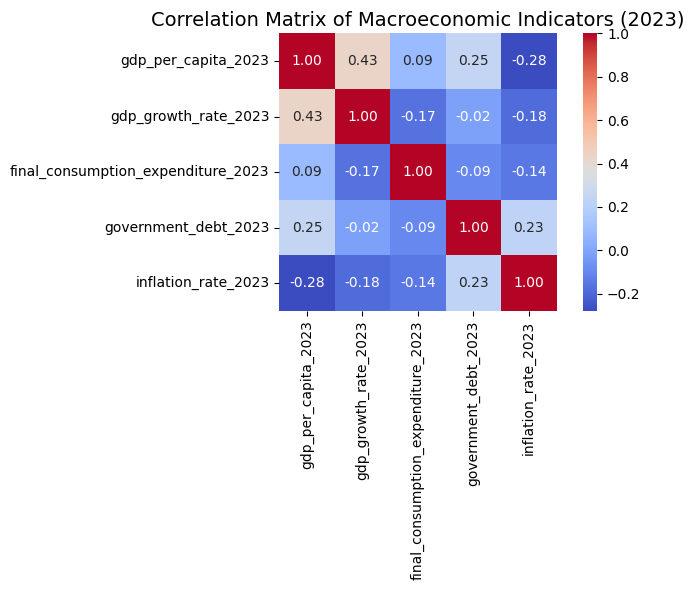

Human Capital


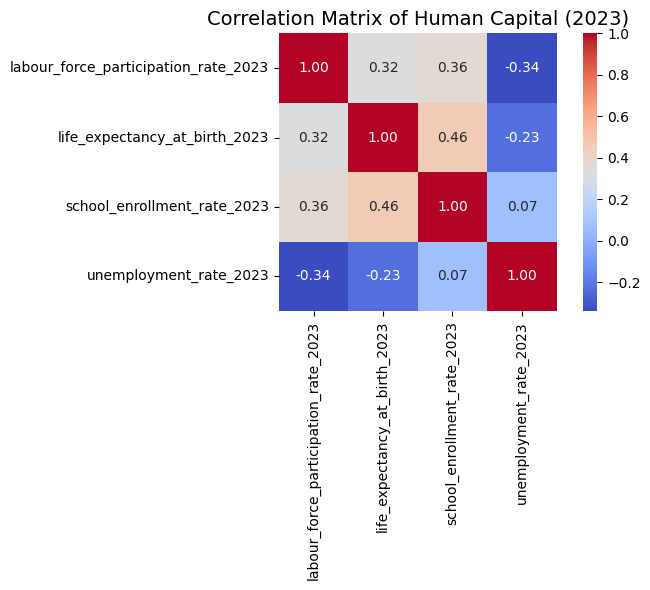

Infrastructure and Technology


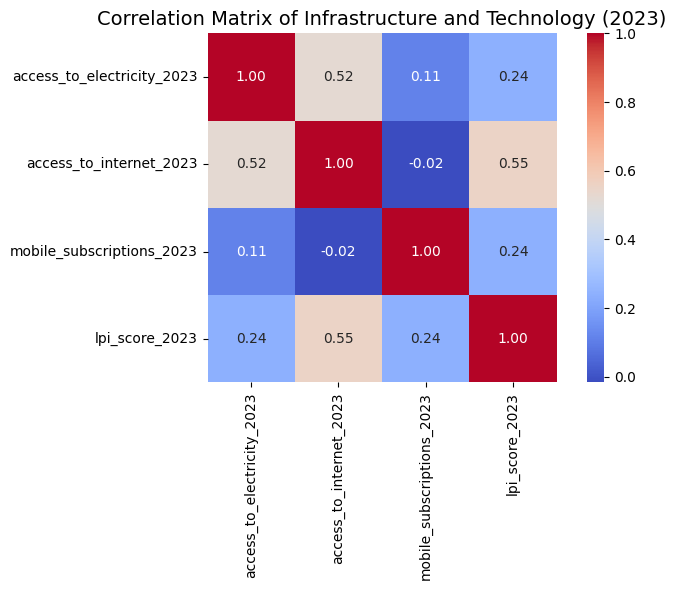

Trade and Investment


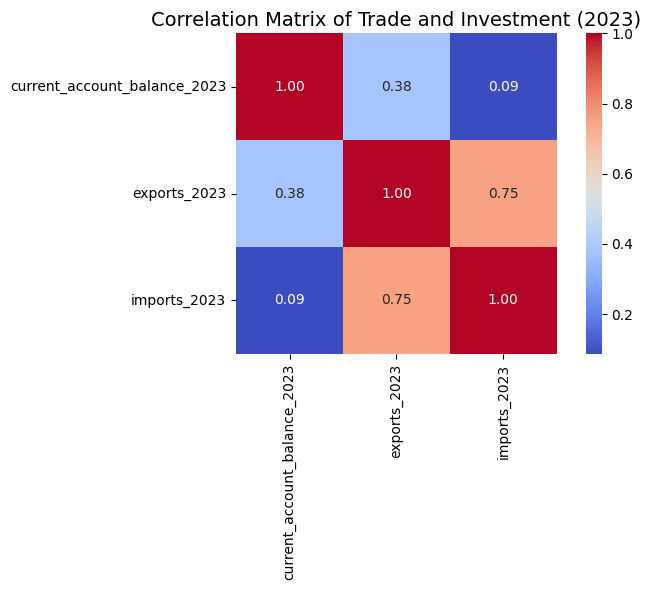

Institution and Political Factors


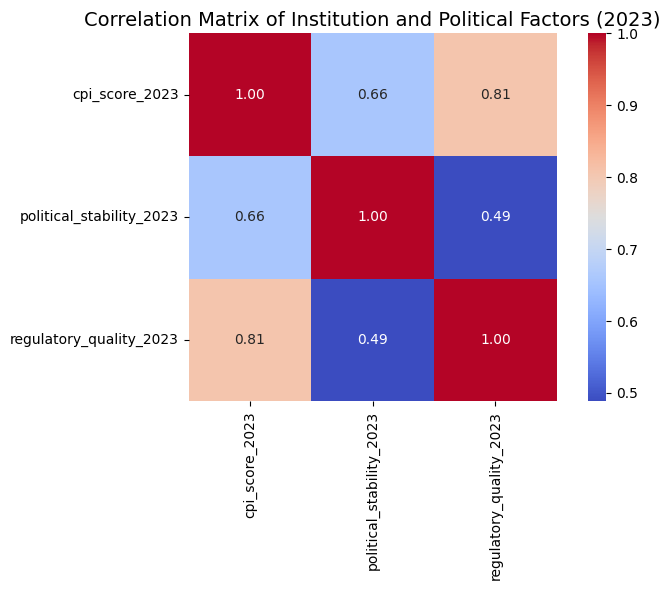

Environmental and Sustainability


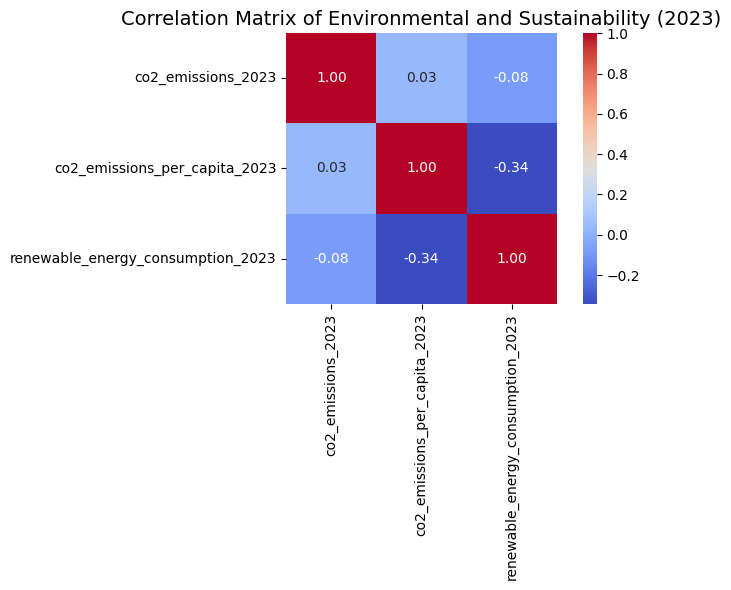

In [1345]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix for all indicators
for x in subcategory_groups.keys():
    print(x)
    subcategory_df = merged_df[subcategory_groups[x]].copy()
    correlation_matrix = subcategory_df.corr()

    # Set plot size
    plt.figure(figsize=(8, 6))

    # Create the heatmap
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)

    # Add title
    plt.title(f"Correlation Matrix of {x} (2023)", fontsize=14)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Sub Group 1 : Macroeconomic Indicators

## Correlation Heatmap

Overall the correlation of the indicators of this sub group is low and medium. There is only gdp_growth_rate and gdp_per_capita have a medium correlation of 0.43
<br>
<br>
<hr>
<br>

# Sub Group 2 : Human Capital

## Corelation Heatmap

In this Human Captial group the overall is mostly medium correlation. While i realised that the school_enrollment_rate and unemployment_rate are having the lowest correlation of 0.07  
<br>
<br>
<hr>
<br>

# Sub Group 3 : Infrastructure and Technology
## Correlation Heatmap
The indicators in this group generally show low to moderate correlation. The strongest relationship observed is between access_to_internet_2023 and lpi_score_2023 with a moderate positive correlation of 0.55. Meanwhile, mobile_subscriptions_2023 is weakly correlated with all other indicators in this subgroup.

<br> <br> <hr> <br>

# Sub Group 4 : Trade and Investment
## Correlation Heatmap
In this subgroup, exports_2023 and imports_2023 show a strong positive correlation of 0.75, indicating a close trade relationship. The current_account_balance_2023 has weaker correlations with both exports (0.38) and imports (0.09), suggesting other influencing factors on the balance.

<br> <br> <hr> <br>

# Sub Group 5 : Institution and Political Factors
## Correlation Heatmap
This group presents strong correlations across all indicators. The highest correlation is between cpi_score_2023 and regulatory_quality_2023 at 0.81, suggesting a close link between corruption perception and regulatory standards. Political stability also shows moderately high correlations with both.

<br> <br> <hr> <br>

# Sub Group 6 : Environmental and Sustainability
## Correlation Heatmap
The correlations in this group are generally weak. Notably, co2_emissions_per_capita_2023 and renewable_energy_consumption_2023 have a moderate negative correlation of -0.34, which is the most significant relationship in this matrix, implying that higher renewable energy usage may associate with lower per capita emissions.


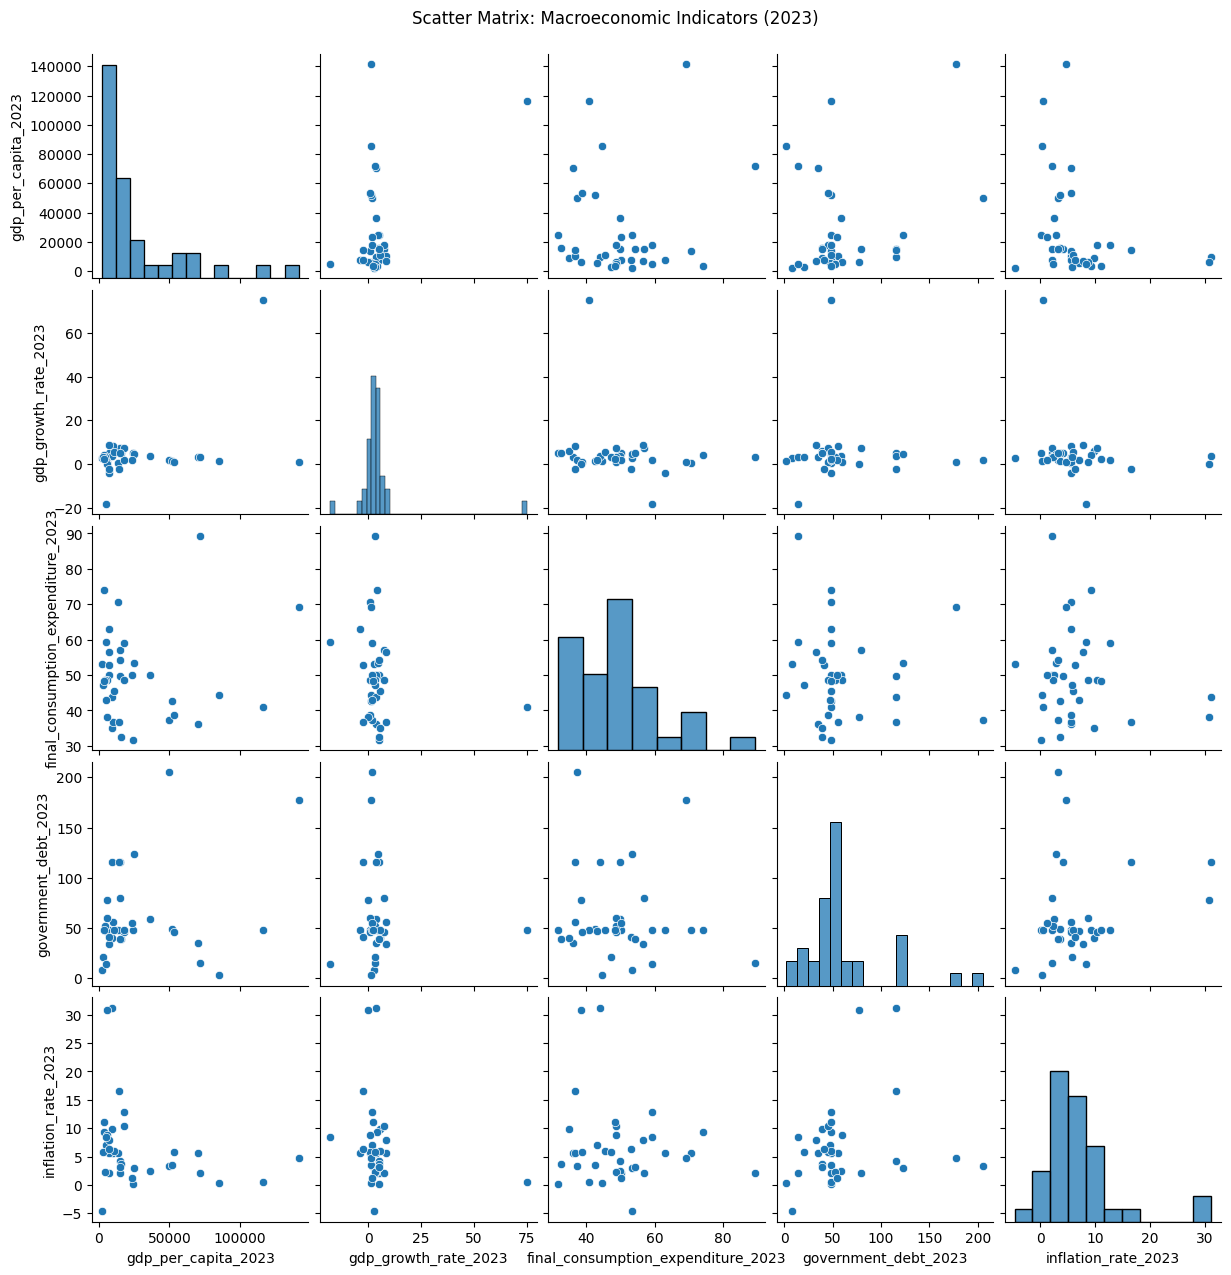

In [1346]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot scatter plots for all macroeconomic indicator pairs
sns.pairplot(macroeconomic_df)
plt.suptitle("Scatter Matrix: Macroeconomic Indicators (2023)", y=1.02)
plt.show()

# Summary of Scatter Matrix: Macroeconomic Indicators(2023)

This scatter matrix visualizes relationships between fice key macroeconomic indicators:

## Overall Patterns

Most scatter plots show no strong linear relationships that showing their relationships are weak, non-linear or influenced by other factors. The distributions along the diagonal(histograms) reveal that GDP per Capita is highly skewed right. GDP Growth Rate have similar growth rates across most countries.Inflation Ragte and Government Debt is positively skewed with some extreme high values. Final Consumption is more normaly distributed among the countries.

## Notable Relationships
GDP per Capita vs. Inflation: Appears to have a weak negative pattern — richer countries may tend to have lower inflation.

GDP per Capita vs. GDP Growth: Mild upward trend, aligning with the moderate positive correlation seen earlier.

Government Debt vs. Inflation: Slight positive association visible, consistent with the correlation value of 0.23.

Most other pairings (e.g., final consumption vs. growth or debt) show scattered, unstructured points — indicating low or no correlation.

## Interpretation
The scatter plots confirm the correlation matrix insights: most indicators are weakly correlated, with GDP per capita and inflation rate showing the most noticeable inverse relationship.

The data spread highlights economic divergence among countries — particularly in income and inflation levels.

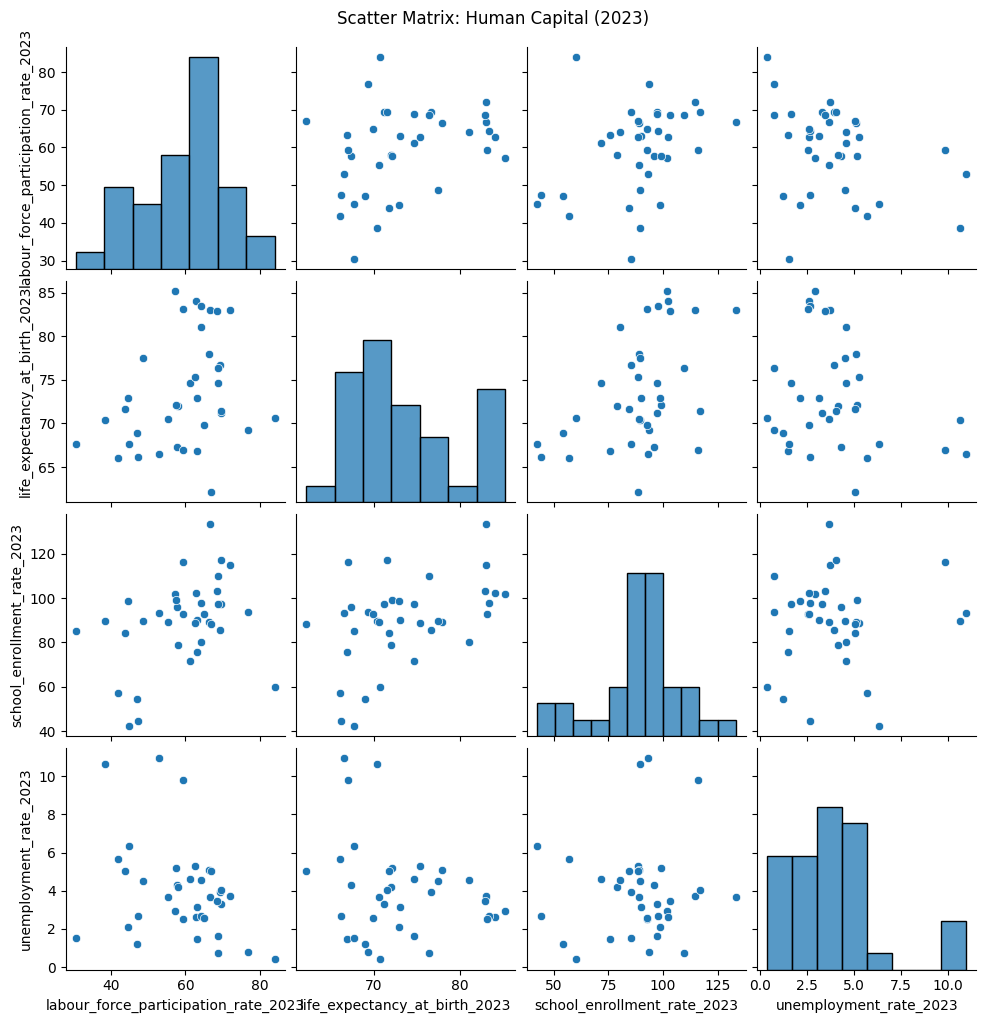

In [1347]:

# Plot scatter plots for all macroeconomic indicator pairs
sns.pairplot(merged_df[human_capital_indicators])
plt.suptitle("Scatter Matrix: Human Capital (2023)", y=1.02)
plt.show()

# Summary of Scatter Matrix: Human Capital Indicators (2023)

## Overall Patterns
Most scatter plots show widely dispersed data points with no strong linear trends, indicating weak or no direct relationships among the variables.

The histograms on the diagonal reveal:

Labour Force Participation Rate: Centered between 50–80%, suggesting moderate variation among countries.

Life Expectancy at Birth: Mostly ranges from 65–85 years, showing relatively stable values across countries.

School Enrollment Rate: Concentrated between 80–110%, with a few lower values and some outliers.

Unemployment Rate: Skewed toward lower values, with most countries under 8%.

## Notable Relationships
Labour Force Participation vs. Unemployment: Somewhat scattered but shows a slight inverse pattern — higher participation may align with lower unemployment.

Life Expectancy vs. School Enrollment: No strong pattern, but a weak positive spread suggests countries with better education may also enjoy higher life expectancy.

Other pairings: Show random distribution, suggesting limited or no direct influence among them.

## Interpretation
The scatter plots indicate that human capital indicators are weakly correlated with one another. While a few pairs hint at minor trends (e.g., lower unemployment with higher labour participation), most relationships appear diffuse. This implies that human capital development is likely influenced by complex, multidimensional factors beyond these individual metrics.

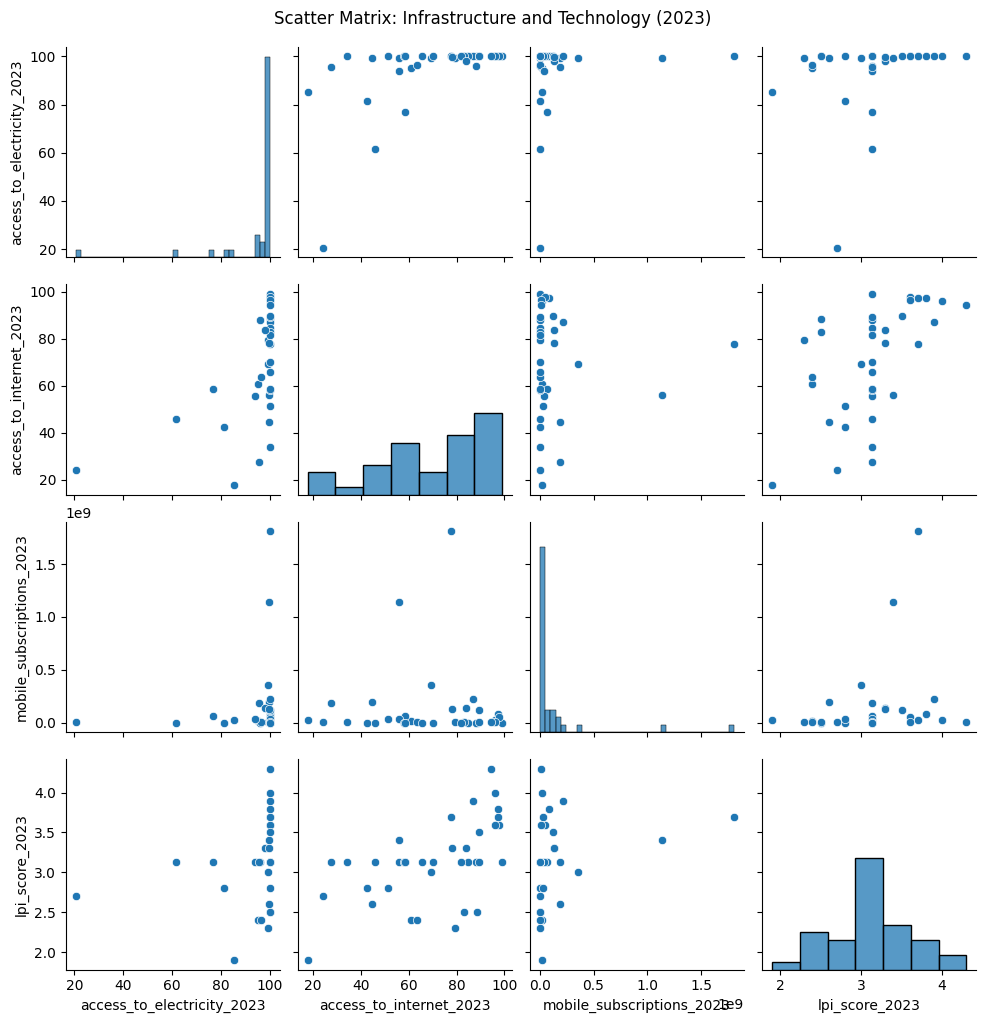

In [1348]:
sns.pairplot(merged_df[infrastructure_indicators])
plt.suptitle("Scatter Matrix: Infrastructure and Technology (2023)", y=1.02)
plt.show()

# Summary of Scatter Matrix: Infrastructure and Technology Indicators (2023)

## Overall Patterns
Most scatter plots show clustering at high values, especially for access to electricity and internet, indicating that many countries are near full access. However, the data is unevenly distributed, with outliers affecting patterns.

Histogram observations:

Access to Electricity: Strongly skewed right — many countries near 100%.

Access to Internet: Spread out more, though many cluster above 80%.

Mobile Subscriptions: Highly skewed — some countries show extremely large values, possibly due to population size or data anomalies.

LPI Score (Logistics Performance Index): More evenly spread from 2 to 4.

## Notable Relationships

Access to Internet vs. LPI Score: Slight positive pattern — better internet access may be linked to better logistics performance.

Access to Electricity vs. Other Indicators: Flat clustering at high values limits visible trends.

Mobile Subscriptions: No clear relationship with other variables due to large numeric scale and outliers.

## Interpretation

The data reveals that basic infrastructure like electricity and internet access is nearly universal in many countries, causing saturation effects in the plots. However, LPI scores and internet access show a weak positive trend, hinting that digital connectivity may play a role in improving logistics. Outliers in mobile subscriptions distort pattern visibility, suggesting a need for normalization in future analyses.

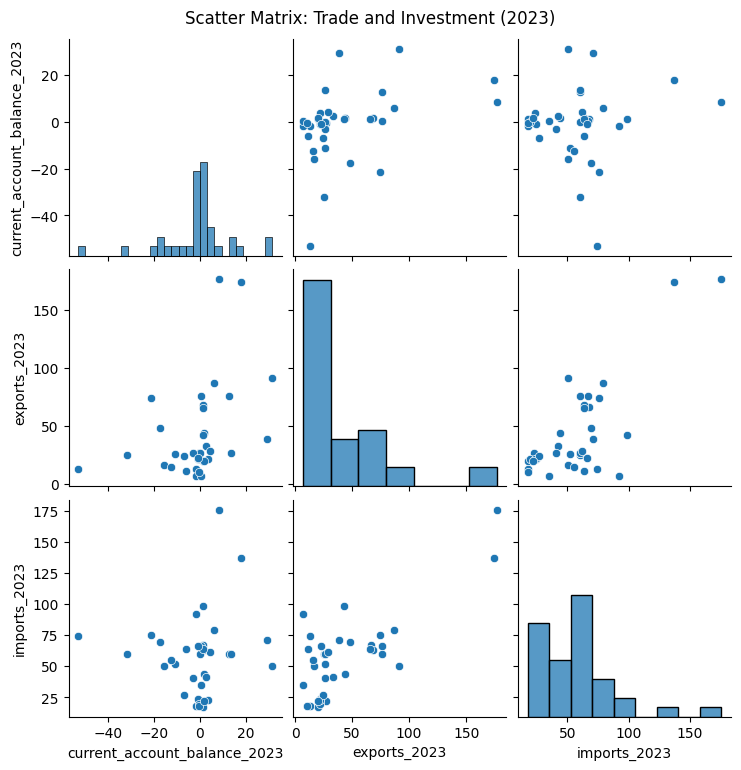

In [1349]:
# Plot scatter plots for all macroeconomic indicator pairs
sns.pairplot(merged_df[trade_and_investment_indicators])
plt.suptitle("Scatter Matrix: Trade and Investment (2023)", y=1.02)
plt.show()

# Summary of Scatter Matrix: Trade and Investment Indicators (2023)

## Overall Patterns

Most plots show moderate clustering with wide spreads, especially for trade values. The data indicates high variability across countries in trade volumes and current account balances.

Histogram highlights:

Current Account Balance: Centered around negative values, skewed slightly left — many countries run trade deficits.

Exports and Imports: Skewed right — most countries have lower volumes, with a few outliers having very high trade figures.

## Notable Relationships
Exports vs. Imports: Shows a clear positive relationship — countries that export more also tend to import more, reflecting mutual trade activity.

Current Account Balance vs. Exports/Imports: Scattered without clear trend, indicating that a high volume of trade doesn’t necessarily mean a surplus or deficit.

## Interpretation
The analysis shows that exports and imports are closely linked, as expected, but trade volume does not directly explain current account balance. The data suggests trade behavior varies widely, with some countries maintaining high trade activity while running deficits or surpluses independently.

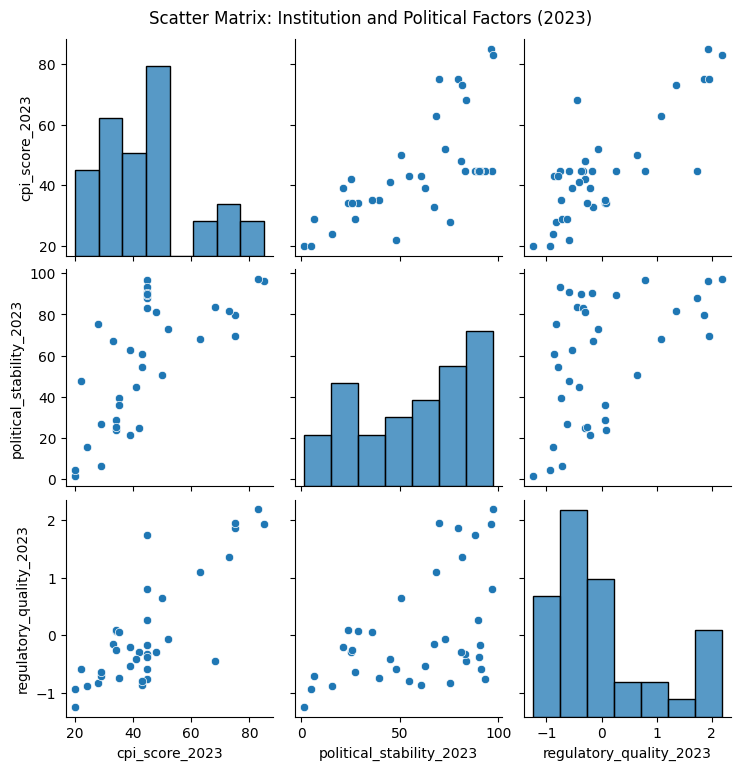

In [1350]:
# Plot scatter plots for all macroeconomic indicator pairs
sns.pairplot(merged_df[institutional_and_political_indicators])
plt.suptitle("Scatter Matrix: Institution and Political Factors (2023)", y=1.02)
plt.show()

# Summary of Scatter Matrix: Institutional and Political Factors (2023)

## Overall Patterns

The data shows moderate to strong positive relationships among all three variables, suggesting a tendency for institutional quality metrics to improve together.

Histogram observations:

CPI Score (Corruption Perception Index): Skewed right — more countries score moderately, with fewer very low or very high scores.

Political Stability: Wide spread across countries but slightly right-skewed — many countries score higher in stability.

Regulatory Quality: Concentrated around 0 to 1, with some negative outliers.

## Notable Relationships

CPI Score vs. Political Stability: Clear positive trend — less corruption is associated with greater political stability.

CPI Score vs. Regulatory Quality: Also positively correlated — better regulatory environments are seen in countries with lower perceived corruption.

Political Stability vs. Regulatory Quality: Strong upward trend — countries with stable political systems tend to have higher regulatory effectiveness.

## Interpretation
These indicators show consistently positive relationships, suggesting that institutional strength, low corruption, and regulatory quality are interrelated. Countries with strong institutions tend to perform better across all governance dimensions, reinforcing the idea that political and institutional quality are mutually reinforcing.

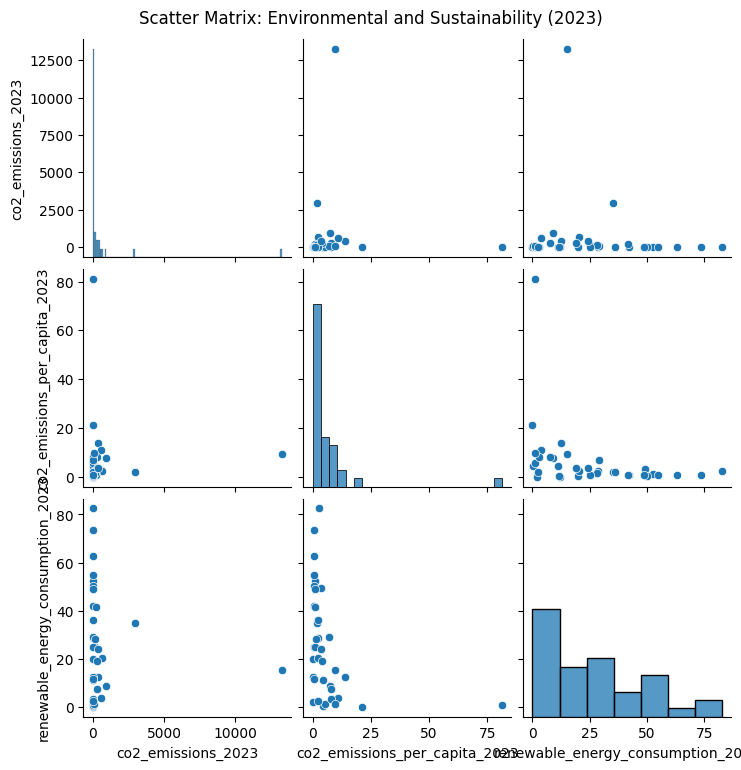

In [1351]:
# Plot scatter plots for all macroeconomic indicator pairs
sns.pairplot(merged_df[environmental_and_sustainability_indicators])
plt.suptitle("Scatter Matrix: Environmental and Sustainability (2023)", y=1.02)
plt.show()

# Summary of Scatter Matrix: Environmental and Sustainability Indicators (2023)

## Overall Patterns
The data is heavily skewed, particularly for total and per capita CO₂ emissions, with a few countries acting as extreme outliers. Most values cluster at the low end of each axis.

Histogram insights:

CO₂ Emissions (Total): Strong right skew — a few countries emit vastly more than others.

CO₂ Emissions per Capita: Also skewed right, with most countries emitting under 20 tons per person.

Renewable Energy Consumption: Spread across the range, though most countries consume less than 40%.

##  Notable Relationships
CO₂ Emissions vs. Renewable Energy: Shows a weak negative pattern — higher renewable energy use may be linked to lower total emissions in some countries.

CO₂ per Capita vs. Renewable Energy: Similar slight inverse trend, but still highly scattered.

CO₂ Total vs. CO₂ per Capita: No strong relationship visible due to differing country sizes and population effects.

## Interpretation
The scatter plots suggest that renewable energy adoption may reduce emissions, but the relationship is weak and highly variable. Outliers and differences in country size/population complicate the interpretation. The plots emphasize the disparity in environmental impact across nations and the importance of scaling and normalization for clearer analysis.


# PCA

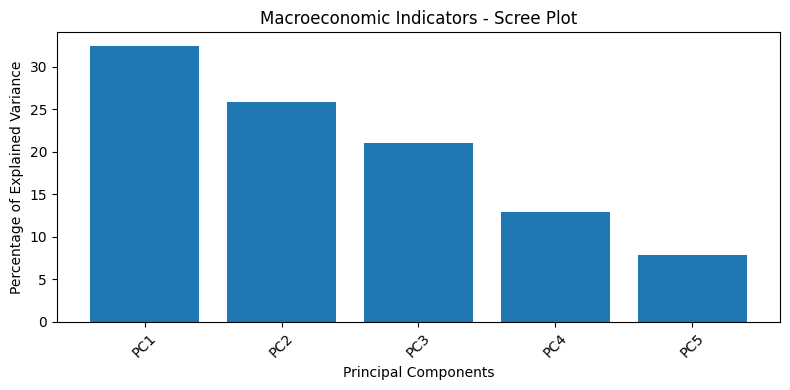

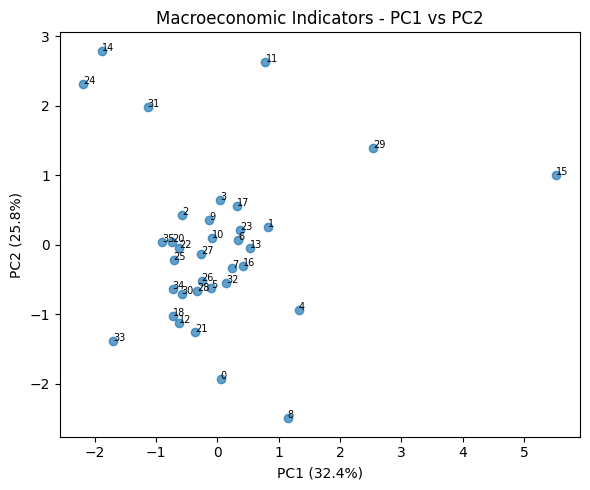


Top contributors to PC1 in Macroeconomic Indicators:
gdp_per_capita_2023                   0.658564
gdp_growth_rate_2023                  0.596273
inflation_rate_2023                   0.452144
government_debt_2023                  0.075382
final_consumption_expenditure_2023    0.025201
dtype: float64

Top contributors to PC2 in Macroeconomic Indicators:
government_debt_2023                  0.666800
inflation_rate_2023                   0.506597
final_consumption_expenditure_2023    0.502024
gdp_growth_rate_2023                  0.156882
gdp_per_capita_2023                   0.148652
dtype: float64

Top contributors to PC3 in Macroeconomic Indicators:
final_consumption_expenditure_2023    0.719061
government_debt_2023                  0.512015
gdp_growth_rate_2023                  0.364220
gdp_per_capita_2023                   0.289326
inflation_rate_2023                   0.066532
dtype: float64

Top contributors to PC4 in Macroeconomic Indicators:
inflation_rate_2023               

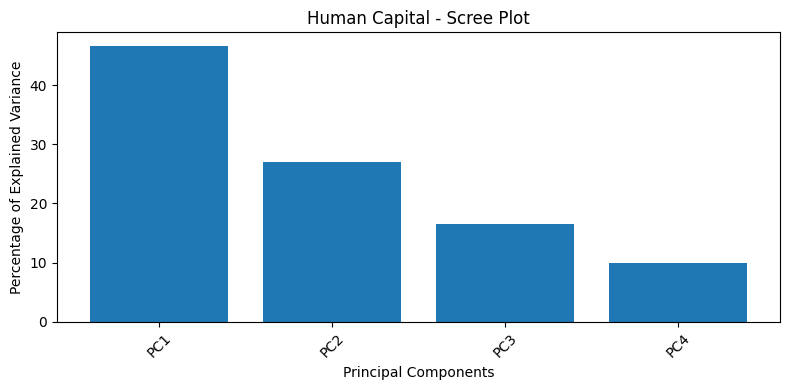

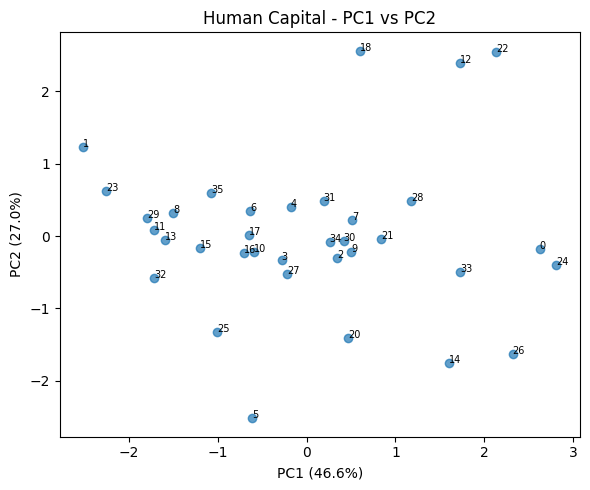


Top contributors to PC1 in Human Capital:
life_expectancy_at_birth_2023           0.578794
labour_force_participation_rate_2023    0.545463
school_enrollment_rate_2023             0.522062
unemployment_rate_2023                  0.308091
dtype: float64

Top contributors to PC2 in Human Capital:
unemployment_rate_2023                  0.800139
school_enrollment_rate_2023             0.547215
labour_force_participation_rate_2023    0.208899
life_expectancy_at_birth_2023           0.129203
dtype: float64

Top contributors to PC3 in Human Capital:
labour_force_participation_rate_2023    0.710508
life_expectancy_at_birth_2023           0.660611
unemployment_rate_2023                  0.213011
school_enrollment_rate_2023             0.115749
dtype: float64

Top contributors to PC4 in Human Capital:
school_enrollment_rate_2023             0.643901
unemployment_rate_2023                  0.468491
life_expectancy_at_birth_2023           0.460324
labour_force_participation_rate_2023    0.392441

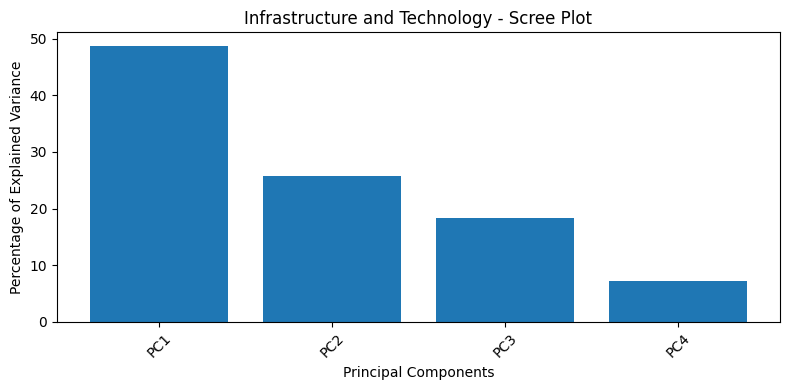

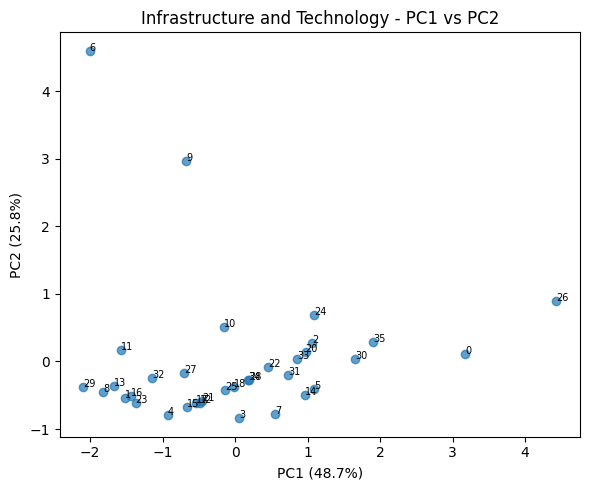


Top contributors to PC1 in Infrastructure and Technology:
access_to_internet_2023       0.622834
lpi_score_2023                0.550566
access_to_electricity_2023    0.520238
mobile_subscriptions_2023     0.195722
dtype: float64

Top contributors to PC2 in Infrastructure and Technology:
mobile_subscriptions_2023     0.933591
access_to_internet_2023       0.290537
access_to_electricity_2023    0.154052
lpi_score_2023                0.142355
dtype: float64

Top contributors to PC3 in Infrastructure and Technology:
access_to_electricity_2023    0.759408
lpi_score_2023                0.609474
mobile_subscriptions_2023     0.171713
access_to_internet_2023       0.149518
dtype: float64

Top contributors to PC4 in Infrastructure and Technology:
access_to_internet_2023       0.710852
lpi_score_2023                0.552407
access_to_electricity_2023    0.359055
mobile_subscriptions_2023     0.246204
dtype: float64


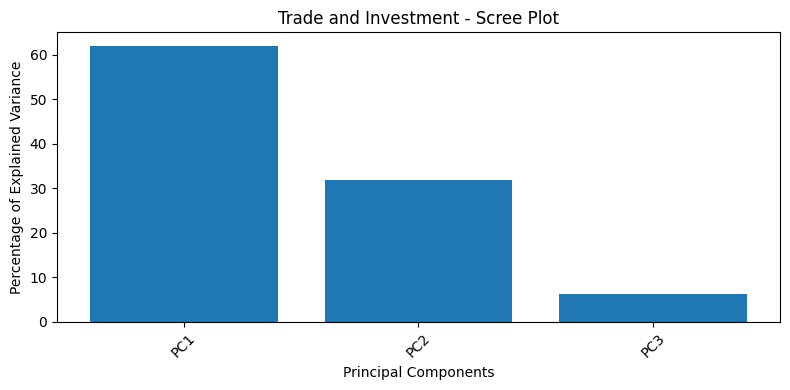

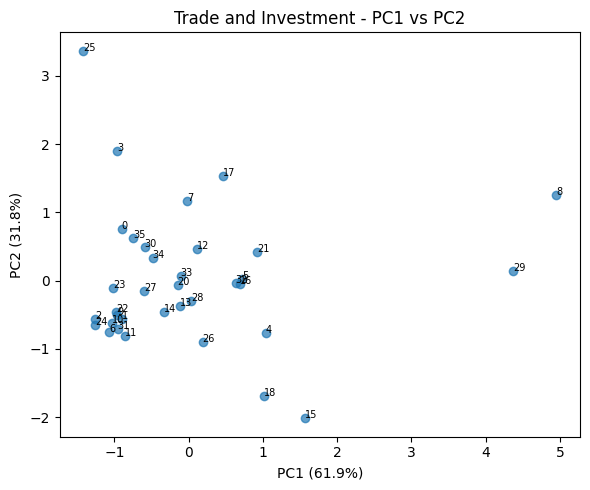


Top contributors to PC1 in Trade and Investment:
exports_2023                    0.683095
imports_2023                    0.634014
current_account_balance_2023    0.362500
dtype: float64

Top contributors to PC2 in Trade and Investment:
current_account_balance_2023    0.893156
imports_2023                    0.445684
exports_2023                    0.060313
dtype: float64

Top contributors to PC3 in Trade and Investment:
exports_2023                    0.727834
imports_2023                    0.631974
current_account_balance_2023    0.266206
dtype: float64


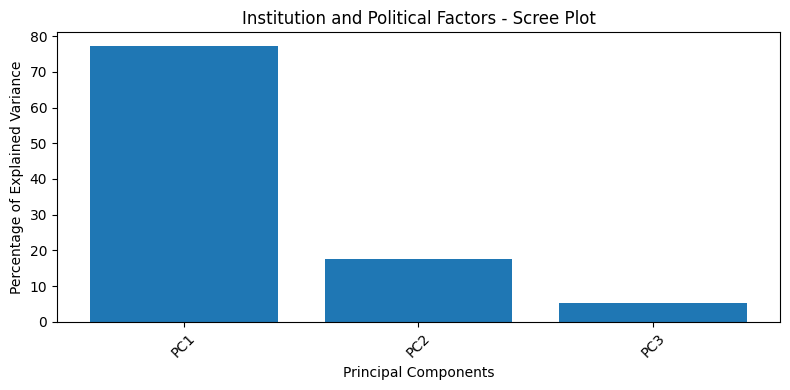

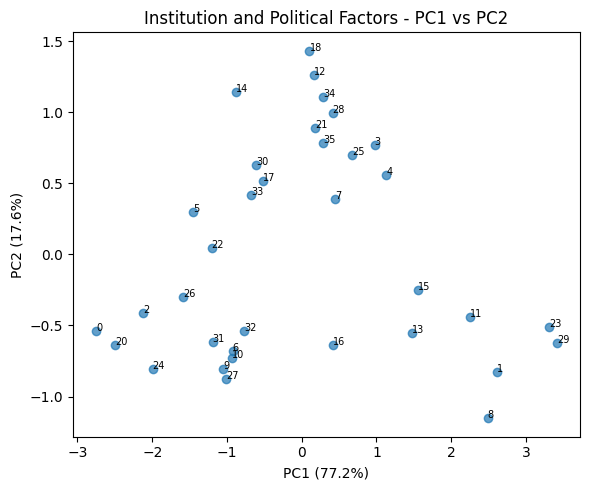


Top contributors to PC1 in Institution and Political Factors:
cpi_score_2023              0.620422
regulatory_quality_2023     0.578462
political_stability_2023    0.529583
dtype: float64

Top contributors to PC2 in Institution and Political Factors:
political_stability_2023    0.802891
regulatory_quality_2023     0.577820
cpi_score_2023              0.146595
dtype: float64

Top contributors to PC3 in Institution and Political Factors:
cpi_score_2023              0.770446
regulatory_quality_2023     0.575766
political_stability_2023    0.273692
dtype: float64


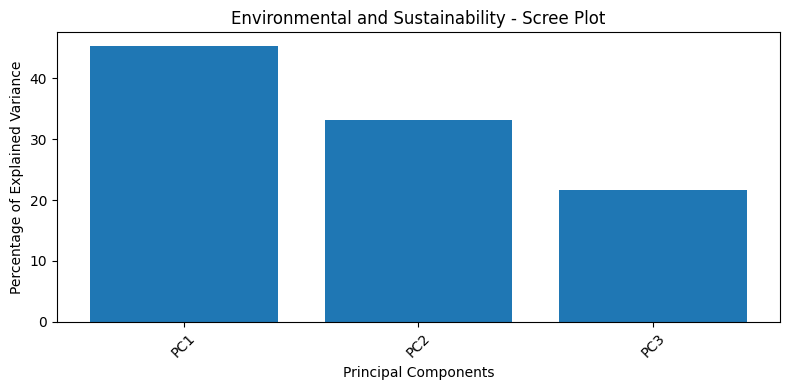

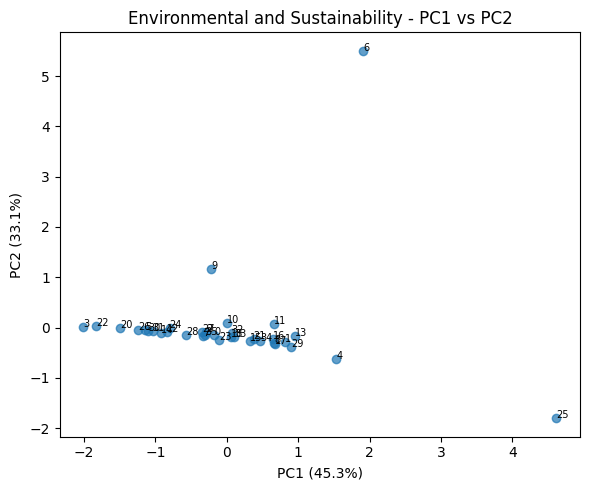


Top contributors to PC1 in Environmental and Sustainability:
co2_emissions_per_capita_2023        0.689878
renewable_energy_consumption_2023    0.682852
co2_emissions_2023                   0.240378
dtype: float64

Top contributors to PC2 in Environmental and Sustainability:
co2_emissions_2023                   0.962665
co2_emissions_per_capita_2023        0.259640
renewable_energy_consumption_2023    0.076566
dtype: float64

Top contributors to PC3 in Environmental and Sustainability:
renewable_energy_consumption_2023    0.726533
co2_emissions_per_capita_2023        0.675763
co2_emissions_2023                   0.124475
dtype: float64


In [1352]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
def run_pca_on_subgroup(df, indicators, group_name):
    # Drop rows with missing values in selected indicators
    X = df[indicators].dropna()

    # PCA fit
    pca = PCA()
    pca_data = pca.fit_transform(X)
    per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
    labels = [f"PC{i+1}" for i in range(len(per_var))]

    # Scree plot
    plt.figure(figsize=(8, 4))
    plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
    plt.ylabel('Percentage of Explained Variance')
    plt.xlabel('Principal Components')
    plt.title(f'{group_name} - Scree Plot')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # PC1 vs PC2 scatter
    pca_df = pd.DataFrame(pca_data, columns=labels, index=X.index)

    plt.figure(figsize=(6, 5))
    plt.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.7)
    for sample in pca_df.index:
        plt.annotate(sample, (pca_df.loc[sample, "PC1"], pca_df.loc[sample, "PC2"]), fontsize=7)
    plt.title(f'{group_name} - PC1 vs PC2')
    plt.xlabel(f'PC1 ({per_var[0]}%)')
    plt.ylabel(f'PC2 ({per_var[1]}%)')
    plt.tight_layout()
    plt.show()

    # Top contributors to each PC
    for i, component in enumerate(pca.components_):
        loading_scores = pd.Series(component, index=indicators)
        top_features = loading_scores.abs().sort_values(ascending=False)
        print(f"\nTop contributors to PC{i+1} in {group_name}:")
        print(top_features)

# Run PCA for each group
for group, indicators in subcategory_groups.items():
    valid_indicators = [col for col in indicators if col in merged_df_standardised.columns]
    if len(valid_indicators) >= 2:
        run_pca_on_subgroup(merged_df_standardised, valid_indicators, group)

# PCA Summary by Subgroup

---

## Sub Group 1: Macroeconomic Indicators

### 1. Scree Plot Overview
- **PC1** explains **32.4%** of the variance.
- **PC2** explains **25.8%**.
- Together, PC1 and PC2 account for **58.2%** of the total variance.
- PC3, PC4, and PC5 explain additional variance, though with diminishing contribution.

### 2. PC1 vs PC2 Scatter Plot
- Visual clustering of countries shows how they relate across the two most significant principal components.
- Some countries (e.g., points 15 and 29) appear as outliers.

### 3. Principal Component Loadings

**PC1 – Economic Strength (32.4%)**
- `gdp_per_capita_2023`: 0.6586  
- `gdp_growth_rate_2023`: 0.5963  
- `inflation_rate_2023`: 0.4521  

**PC2 – Fiscal and Price Dynamics (25.8%)**
- `government_debt_2023`: 0.6668  
- `inflation_rate_2023`: 0.5066  
- `final_consumption_expenditure_2023`: 0.5020  

**PC3 – Consumption Focus**
- `final_consumption_expenditure_2023`: 0.7191  
- `government_debt_2023`: 0.5120  

**PC4 – Inflation-Growth Trade-off**
- `inflation_rate_2023`: 0.6768  
- `gdp_growth_rate_2023`: 0.5110  

**PC5 – Residual Patterns**
- `gdp_per_capita_2023`: 0.6782  
- `gdp_growth_rate_2023`: 0.4755  

### 4. Summary Insight
- Highlights economic strength, fiscal dynamics, consumption behavior, and inflation-growth trade-offs.

---

## Sub Group 2: Human Capital

### 1. Scree Plot Overview
- **PC1** explains **46.6%**, **PC2** explains **27.0%**.
- Combined: **73.6%** of the total variance.

### 2. PC1 vs PC2 Scatter Plot
- Most countries cluster tightly, with a few outliers (e.g., points 1, 5, 12, 22).

### 3. Principal Component Loadings

**PC1 – General Human Capital Strength (46.6%)**
- `life_expectancy_at_birth_2023`: 0.5788  
- `labour_force_participation_rate_2023`: 0.5455  
- `school_enrollment_rate_2023`: 0.5221  

**PC2 – Employment and Education Focus**
- `unemployment_rate_2023`: 0.8001  
- `school_enrollment_rate_2023`: 0.5472  

**PC3 – Labour and Health Contrast**
- `labour_force_participation_rate_2023`: 0.7105  
- `life_expectancy_at_birth_2023`: 0.6606  

**PC4 – Residual Educational & Labour Variation**
- `school_enrollment_rate_2023`: 0.6439  
- `unemployment_rate_2023`: 0.4685  

### 4. Summary Insight
- PCs reveal human development, employment issues, and educational variation.

---

## Sub Group 3: Infrastructure and Technology

### 1. Scree Plot Overview
- **PC1**: 48.7%, **PC2**: 25.8% → Total: **74.5%**

### 2. PC1 vs PC2 Scatter Plot
- Most countries cluster tightly; some (e.g., 6, 9, 26) are outliers.

### 3. Principal Component Loadings

**PC1 – Infrastructure and Connectivity**
- `access_to_internet_2023`: 0.6228  
- `lpi_score_2023`: 0.5506  
- `access_to_electricity_2023`: 0.5202  

**PC2 – Mobile Penetration**
- `mobile_subscriptions_2023`: 0.9336  
- `access_to_internet_2023`: 0.2905  

**PC3 – Electricity and Logistics Emphasis**
- `access_to_electricity_2023`: 0.7594  
- `lpi_score_2023`: 0.6095  

**PC4 – Internet and Logistics Details**
- `access_to_internet_2023`: 0.7109  
- `lpi_score_2023`: 0.5524  

### 4. Summary Insight
- Reveals infrastructure strength and tech access patterns across countries.

---

## Sub Group 4: Trade and Investment

### 1. Scree Plot Overview
- **PC1**: 61.9%, **PC2**: 31.8% → Total: **93.7%**

### 2. PC1 vs PC2 Scatter Plot
- Some outliers (e.g., points 8, 25, 29, 15) deviate from the central cluster.

### 3. Principal Component Loadings

**PC1 – Trade Volume**
- `exports_2023`: 0.6831  
- `imports_2023`: 0.6340  
- `current_account_balance_2023`: 0.3625  

**PC2 – Trade Balance Emphasis**
- `current_account_balance_2023`: 0.8932  
- `imports_2023`: 0.4457  

**PC3 – Trade Direction Variability**
- `exports_2023`: 0.7278  
- `imports_2023`: 0.6320  

### 4. Summary Insight
- Highlights trade intensity and surplus/deficit distinctions between countries.

---

## Sub Group 5: Institution and Political Factors

### 1. Scree Plot Overview
- **PC1**: 77.2%, **PC2**: 17.6% → Total: **94.8%**

### 2. PC1 vs PC2 Scatter Plot
- Countries like 18, 12, 14 stand out; others like 23, 8, 29 deviate negatively on PC1.

### 3. Principal Component Loadings

**PC1 – Institutional Strength**
- `cpi_score_2023`: 0.6204  
- `regulatory_quality_2023`: 0.5785  
- `political_stability_2023`: 0.5296  

**PC2 – Political Stability Emphasis**
- `political_stability_2023`: 0.8029  
- `regulatory_quality_2023`: 0.5778  

**PC3 – Corruption and Governance Details**
- `cpi_score_2023`: 0.7704  
- `regulatory_quality_2023`: 0.5758  

### 4. Summary Insight
- Captures governance quality, stability, and corruption perceptions.

---

## Sub Group 6: Environmental and Sustainability

### 1. Scree Plot Overview
- **PC1**: 45.3%, **PC2**: 33.1% → Total: **78.4%**

### 2. PC1 vs PC2 Scatter Plot
- Outliers (e.g., points 6 and 25) indicate significant differences in environmental indicators.

### 3. Principal Component Loadings

**PC1 – Emissions and Renewables Mix**
- `co2_emissions_per_capita_2023`: 0.6899  
- `renewable_energy_consumption_2023`: 0.6829  
- `co2_emissions_2023`: 0.2404  

**PC2 – Total CO₂ Emissions Focus**
- `co2_emissions_2023`: 0.9627  
- `co2_emissions_per_capita_2023`: 0.2596  

**PC3 – Renewable Energy Contrast**
- `renewable_energy_consumption_2023`: 0.7265  
- `co2_emissions_per_capita_2023`: 0.6758  

### 4. Summary Insight
- Indicates countries' balance between emissions and renewable energy use.
